In [1]:
"""
In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets.
Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel 
with SVMs. In the next half of the exercise, you will be using support vector machines to build a spam classifier.
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from scipy.io import loadmat
from sklearn.metrics import accuracy_score

Visualizing Data


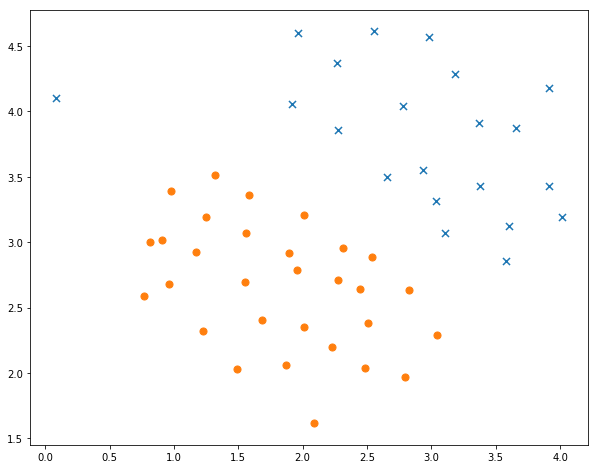

In [2]:
"""
We will begin by with a 2D example dataset which can be separated by a linear boundary.In this part of the exercise, 
you will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that
controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the
examples correctly. C plays a role similar to 1 , where λ is the regularization parameter that we were using λ 
previously for logistic regression.
"""
#loading data as pandas dataframe
#refer to : http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
data = loadmat('ex6data1.mat')
X=data['X']
y=data['y']
data=np.c_[X,y]
data_pd=pd.DataFrame(data,columns=["x1","x2","y"])#segregating different features of x
y_val1=data_pd[y==0]#segregating data where y value is 0
y_val2=data_pd[y==1]#segregating data where y value is 1


print("Visualizing Data")
#visualizing data
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_val2['x1'], y_val2['x2'], s=50, marker='x', label='Positive')#plotting y=1 as x
ax.scatter(y_val1['x1'], y_val1['x2'], s=50, marker='o', label='Negative')#plotting y=0 as o
plt.show()


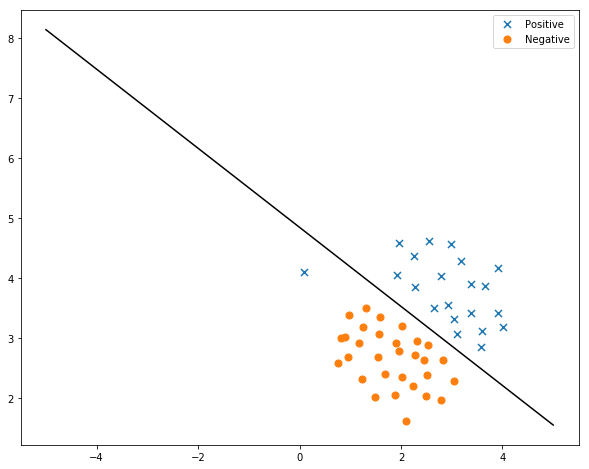

NOTE: there is one misclassified data


In [3]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_val2['x1'], y_val2['x2'], s=50, marker='x', label='Positive')
ax.scatter(y_val1['x1'], y_val1['x2'], s=50, marker='o', label='Negative')
ax.legend()

def plot_classifier(svc):
    """
    function to plot the linear boundary made using the svm
    """
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (svc.intercept_[0]) / w[1] #equation of line of best fit(similiar to y=mx+c)
    plt.plot(xx, yy, 'k-')
    plt.show()

# we want to find the divider that classifies this data the best. lets try with c=1 first
C=1
#here, we use the predefined svm function of sklearn and we use a linear kernel to fit the data
svc=svm.SVC(kernel='linear',C=C).fit(X,y.ravel())# notice that one point is classified wrong
plot_classifier(svc)#plotting the classifier on the data

print("NOTE: there is one misclassified data")

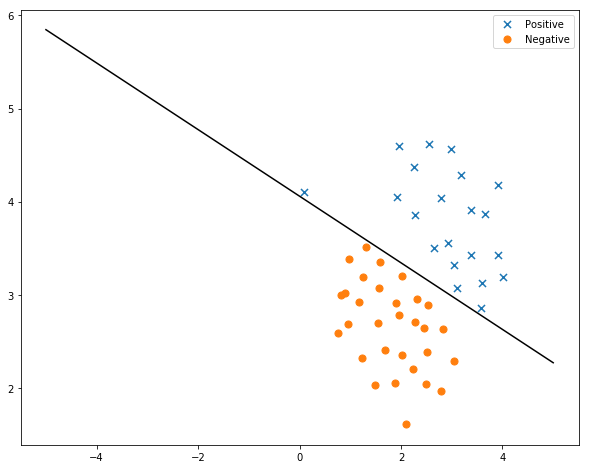

NOTE: All data points are classified correctly


In [4]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_val2['x1'], y_val2['x2'], s=50, marker='x', label='Positive')
ax.scatter(y_val1['x1'], y_val1['x2'], s=50, marker='o', label='Negative')
ax.legend()

"""
Here we are doing exactly what we did in the previous call, however we are modifying the C parameter to get a boundary
which fits the data more accurately
"""
C=100
svc1=svm.SVC(kernel='linear',C=C).fit(X,y.ravel())
plot_classifier(svc1)
print("NOTE: All data points are classified correctly")

The equation can be represented as:


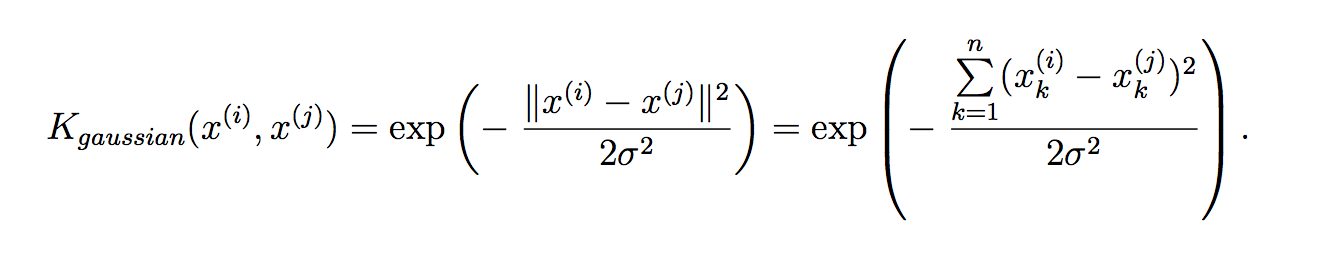

In [5]:
"""
In this part of the exercise, you will be using SVMs to do non-linear clas- sification. In particular, you will be
using SVMs with Gaussian kernels on datasets that are not linearly separable.

To find non-linear decision boundaries with the SVM, we need to first im- plement a Gaussian kernel. You can think of 
the Gaussian kernel as a sim- ilarity function that measures the “distance” between a pair of examples, (x(i),x(j)).
The Gaussian kernel is also parameterized by a bandwidth pa- rameter, σ, which determines how fast the similarity 
metric decreases (to 0) as the examples are further apart.
"""
print("The equation can be represented as:")

from IPython.display import Image
Image(filename='g.jpg')


In [6]:
def gaussian(x1,x2,sigma):
    """
    Implementing the above gausian kernel. we find the sum of all the values of the matrix obtained after obtaining the 
    squared difference between the x1 and x2 matrix. we find the exponent of this value divided by twice the square of 
    the sigma value
    """
    return np.exp(-(np.sum(np.power((x1-x2),2)))/(2*(sigma**2)))

#trying the function out with two sample x1 and x2 values
x1=np.array([1,2,1])
x2=np.array([0,4,-1])
print(gaussian(x1,x2,2))

0.324652467358


Visualizing Data


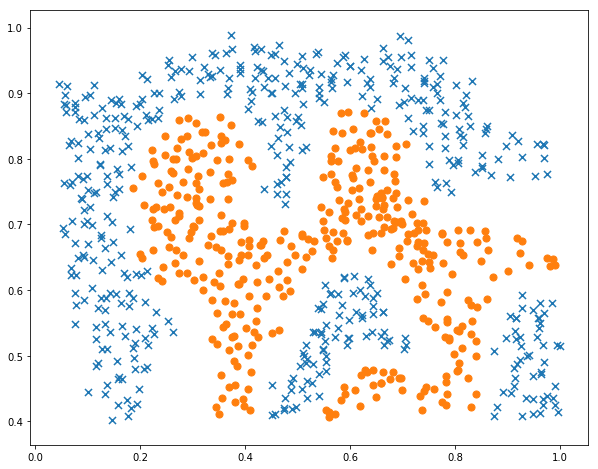

In [7]:
"""
We now want to use the gausian kernel to plot a non-linear boundary to the given dataset
"""
C=100
data = loadmat('ex6data2.mat')
X=data['X']
y=data['y']
data=np.c_[X,y]
data_pd=pd.DataFrame(data,columns=["x1","x2","y"])#segregating different features of x
y_val1=data_pd[y==0]#segregating data where y value is 0
y_val2=data_pd[y==1]#segregating data where y value is 1


print("Visualizing Data")
#visualizing data
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_val2['x1'], y_val2['x2'], s=50, marker='x', label='Positive')#plotting y=1 as x
ax.scatter(y_val1['x1'], y_val1['x2'], s=50, marker='o', label='Negative')#plotting y=0 as o
plt.show()



In [8]:
C=100
"""
Here we are using sklearns predefined svm function using the rbf, guassian kernel to fit the data. 
gamma signifies the values of sigma
"""
svc1=svm.SVC(kernel='rbf',C=C,gamma=10).fit(X,y.ravel())#training the svm on the data
h = 0.01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc1.predict(np.c_[xx.ravel(), yy.ravel()])#this uses the built svm to predict values of y for given x


Visualizing Data


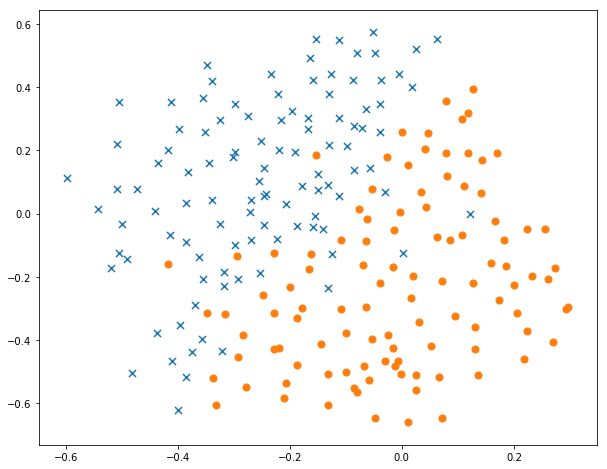

In [9]:
"""
Your task is to use the cross validation set Xval, yval to determine the best C and σ parameter to use. 
You should write any additional code nec- essary to help you search over the parameters C and σ. For both C and σ, we
suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all
possible pairs of values for C and σ (e.g., C = 0.3 and σ = 0.1). For example, if you try each of the 8 values listed
above for C and for σ2, you would end up training and evaluating (on the cross validation set) a total of 82 = 64 
different models.
"""
data = loadmat('ex6data3.mat')
X=data['X']
y=data['y']
X_val=data['Xval']
y_val=data['yval']
data=np.c_[X,y]
data_pd=pd.DataFrame(data,columns=["x1","x2","y"])#segregating different features of x
y_val1=data_pd[y==0]#segregating data where y value is 0
y_val2=data_pd[y==1]#segregating data where y value is 1


print("Visualizing Data")
#visualizing data
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_val2['x1'], y_val2['x2'], s=50, marker='x', label='Positive')#plotting y=1 as x
ax.scatter(y_val1['x1'], y_val1['x2'], s=50, marker='o', label='Negative')#plotting y=0 as o
plt.show()



In [10]:
#choosing values of sigma and C using cross validation datasets
C_values=[0.01, 0.03, 0.1,0.3,1,3,10,30,100]#initializing a list of possible c values
sigma_values=[0.01, 0.03, 0.1,0.3,1,3,10,30,100]#initialzing a list of possible sigma values
a=np.zeros((len(C_values),len(C_values)))#initializing a zero matrix of dimensions of the number of c and sigma values
for i in range(len(C_values)):
    for j in range(len(sigma_values)):#iterating through each sigma and c value in the lists
        c=C_values[i]#temporarily storing a c value
        s=sigma_values[j]#temporarily storing a sigma value
        svc1 = svm.SVC(kernel='rbf', C=c, gamma=s).fit(X, y.ravel())#training a gaussian svm using temp c and sigma values
        results= svc1.predict(X_val)#use it to predict y for a given x value
        a[i][j]=accuracy_score(y_val.ravel(), results)#storing the accuracy value of the different c and sigma combinations in the a matrix
index=(np.argwhere(a == np.max(a))[0])#store the index of the element with the highest accuracy in the a matrix
c=C_values[index[0]]# optimal c value
sigma=sigma_values[index[1]]#optimal of sigma 
print("the c value is:c",c)
print("the sigma value is:",sigma)

the c value is:c 0.3
the sigma value is: 100


In [11]:
"""
Using the optimal c and sigma values obtained from the previous cell to fit actual X data the svm model on the given data
"""
svc2= svm.SVC(kernel='rbf', C=c, gamma=sigma).fit(X, y.ravel())
result=svc2.predict(X)
acc=accuracy_score(y.ravel(),result)#calculating the accuracy of the model
print("The accuracy is",acc)

The accuracy is 0.952606635071


In [15]:
"""
SPAM CLASSIFICATION

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with
high accuracy. In this part of the exer- cise, you will use SVMs to build your own spam filter.
You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). 
In particular, you need to convert each email into a feature vector x ∈ Rn. The following parts of the exercise will 
walk you through how such a feature vector can be constructed from an email.
"""
data = loadmat('spamTrain.mat')#loading train data
data1= loadmat('spamTest.mat')#loading test data
#print(data)
X=data['X']
#print(X)
y=data['y']

X_test=data1['Xtest']
y_test=data1['ytest']
c=0.3#choosing c and sigma values
sigma=100
#svc2= svm.SVC(kernel='rbf', C=c, gamma=sigma).fit(X, y.ravel())
svc2=svm.SVC().fit(X, y.ravel())#building svm
result=svc2.predict(X)#fitting svm to the data
acc=accuracy_score(y.ravel(),result)#calculating accuracy
print("The accuracy is:",acc)

The accuracy is: 0.944
